# Vamos a (intentar) resolver el TSP

In [17]:
capitals = [
    "Montevideo", "Canelones", "Maldonado", "Rocha", "Treinta y Tres",
    "Lavalleja", "Florida", "Durazno", "Cerro Largo", "Rivera",
    "Tacuarembó", "Salto", "Paysandú", "Río Negro", "Soriano",
    "Colonia", "San José", "Flores", "Artigas"
]

distance_matrix = [
    # M   C   Ma  R   TT  L   F   D   CL  Ri  T   Sa  P   RN  So  Co  SJ  Fl  A
    [0,  50, 130, 200, 320, 120, 100, 180, 400, 500, 450, 480, 420, 400, 300, 180, 100, 200, 600], # Montevideo
    [50, 0,  110, 180, 300, 90,  80,  160, 380, 480, 430, 460, 400, 380, 280, 160, 80,  180, 580], # Canelones
    [130, 110, 0,  70,  190, 100, 190, 220, 340, 450, 400, 430, 370, 350, 250, 130, 110, 260, 560], # Maldonado
    [200, 180, 70,  0,  120, 170, 260, 290, 410, 520, 470, 500, 440, 420, 320, 200, 180, 330, 630], # Rocha
    [320, 300, 190, 120, 0,  290, 380, 410, 530, 640, 590, 620, 560, 540, 440, 320, 300, 450, 750], # Treinta y Tres
    [120, 90,  100, 170, 290, 0,  130, 160, 280, 390, 340, 370, 310, 290, 190, 120, 90,  240, 540], # Lavalleja
    [100, 80,  190, 260, 380, 130, 0,  100, 220, 330, 280, 310, 250, 230, 130, 100, 70,  200, 500], # Florida
    [180, 160, 220, 290, 410, 160, 100, 0,  320, 430, 380, 410, 350, 330, 230, 180, 150, 250, 550], # Durazno
    [400, 380, 340, 410, 530, 280, 220, 320, 0,  250, 200, 230, 170, 150, 50,  320, 300, 350, 380], # Cerro Largo
    [500, 480, 450, 520, 640, 390, 330, 430, 250, 0,  50,  80,  20,  50,  100, 480, 460, 510, 160], # Rivera
    [450, 430, 400, 470, 590, 340, 280, 380, 200, 50,  0,  30,  80,  60,  50,  430, 410, 460, 210], # Tacuarembó
    [480, 460, 430, 500, 620, 370, 310, 410, 230, 80,  30,  0,  110, 90,  100, 460, 440, 490, 240], # Salto
    [420, 400, 370, 440, 560, 310, 250, 350, 170, 20,  80,  110, 0,  40,  150, 400, 380, 430, 180], # Paysandú
    [400, 380, 350, 420, 540, 290, 230, 330, 150, 50,  60,  90,  40,  0,  140, 380, 360, 410, 200], # Río Negro
    [300, 280, 250, 320, 440, 190, 130, 230, 50,  100, 50,  100, 150, 140, 0,  280, 260, 310, 380], # Soriano
    [180, 160, 130, 200, 320, 120, 100, 180, 320, 480, 430, 460, 400, 380, 280, 0,  80,  130, 540], # Colonia
    [100, 80,  110, 180, 300, 90,  70,  150, 300, 460, 410, 440, 380, 360, 260, 80,  0,  150, 520], # San José
    [200, 180, 260, 330, 450, 240, 200, 250, 350, 510, 460, 490, 430, 410, 310, 130, 150, 0,  600], # Flores
    [600, 580, 560, 630, 750, 540, 500, 550, 380, 160, 210, 240, 180, 200, 380, 540, 520, 600, 0]  # Artigas
]

## Fuerza Bruta


=== n = 2 ciudades ===
Ruta óptima:
Montevideo -> Canelones -> Montevideo
Costo total: 100
Tiempo: 0.000000 s

=== n = 3 ciudades ===
Ruta óptima:
Montevideo -> Canelones -> Maldonado -> Montevideo
Costo total: 290
Tiempo: 0.000000 s

=== n = 4 ciudades ===
Ruta óptima:
Montevideo -> Canelones -> Maldonado -> Rocha -> Montevideo
Costo total: 430
Tiempo: 0.000000 s

=== n = 5 ciudades ===
Ruta óptima:
Montevideo -> Canelones -> Maldonado -> Rocha -> Treinta y Tres -> Montevideo
Costo total: 670
Tiempo: 0.001008 s

=== n = 6 ciudades ===
Ruta óptima:
Montevideo -> Canelones -> Lavalleja -> Maldonado -> Rocha -> Treinta y Tres -> Montevideo
Costo total: 750
Tiempo: 0.002995 s

=== n = 7 ciudades ===
Ruta óptima:
Montevideo -> Canelones -> Maldonado -> Rocha -> Treinta y Tres -> Lavalleja -> Florida -> Montevideo
Costo total: 870
Tiempo: 0.015007 s

=== n = 8 ciudades ===
Ruta óptima:
Montevideo -> Canelones -> Maldonado -> Rocha -> Treinta y Tres -> Lavalleja -> Durazno -> Florida -> Mon

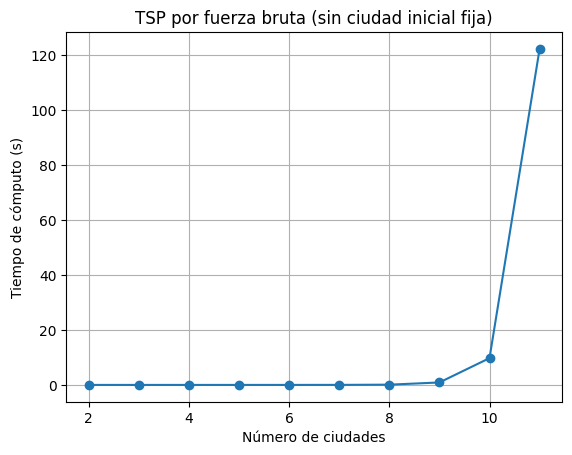

In [18]:
import itertools
import time
import matplotlib.pyplot as plt


def tsp_bruteforce(nodes):
    best_cost = float("inf")
    best_path = None

    for perm in itertools.permutations(nodes):
        path = list(perm) + [perm[0]]  # ciclo cerrado
        cost = sum(
            distance_matrix[path[i]][path[i + 1]]
            for i in range(len(path) - 1)
        )

        if cost < best_cost:
            best_cost = cost
            best_path = path

    return best_path, best_cost

# =========================
# Experimento incremental
# =========================
ns = []
times = []

for n in range(2, 12):  # de 2 a 12 ciudades
    nodes = list(range(n))  # primeras n ciudades

    t0 = time.time()
    path, cost = tsp_bruteforce(nodes)
    elapsed = time.time() - t0

    route_names = [capitals[i] for i in path]

    print(f"\n=== n = {n} ciudades ===")
    print("Ruta óptima:")
    print(" -> ".join(route_names))
    print("Costo total:", cost)
    print(f"Tiempo: {elapsed:.6f} s")

    ns.append(n)
    times.append(elapsed)

# =========================
# Plot tiempo vs n
# =========================
plt.figure()
plt.plot(ns, times, marker="o")
plt.xlabel("Número de ciudades")
plt.ylabel("Tiempo de cómputo (s)")
plt.title("TSP por fuerza bruta (sin ciudad inicial fija)")
plt.grid(True)
plt.show()


Ajuste factorial (mínimos cuadrados)
c = 3.361e-06
Modelo: t(n) = c * n!


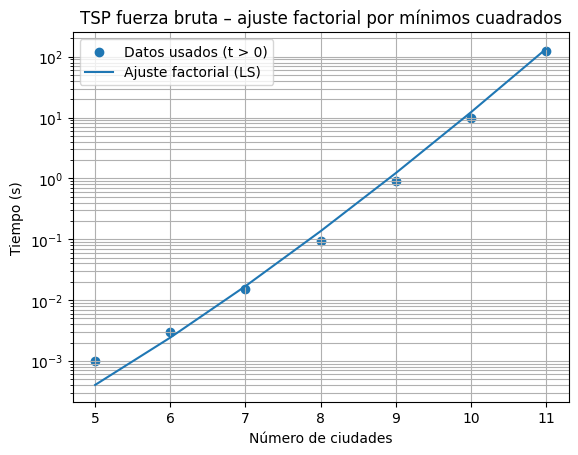

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

# =========================
# Datos
# =========================
n_data = np.array(ns)
t_data = np.array(times)

# =========================
# Filtrar tiempos nulos
# =========================
mask = t_data > 0
n_data = n_data[mask]
t_data = t_data[mask]

# =========================
# Ajuste factorial por mínimos cuadrados
# Modelo: t(n) = c * n!
# log t = log c + log(n!)
# =========================
log_t = np.log(t_data)
log_fact = np.array([math.log(math.factorial(n)) for n in n_data])

# y = log t - log(n!) = log c
y = log_t - log_fact
A = np.ones((len(y), 1))

log_c, _, _, _ = np.linalg.lstsq(A, y, rcond=None)
log_c = log_c[0]
c = np.exp(log_c)

print("Ajuste factorial (mínimos cuadrados)")
print(f"c = {c:.3e}")
print("Modelo: t(n) = c * n!")

# =========================
# Curva ajustada
# =========================
n_fit = np.arange(min(n_data), max(n_data) + 1)
t_fit = np.array([c * math.factorial(n) for n in n_fit])

# =========================
# Plot
# =========================
plt.figure()
plt.scatter(n_data, t_data, label="Datos usados (t > 0)")
plt.plot(n_fit, t_fit, label="Ajuste factorial (LS)")
plt.yscale("log")
plt.xlabel("Número de ciudades")
plt.ylabel("Tiempo (s)")
plt.title("TSP fuerza bruta – ajuste factorial por mínimos cuadrados")
plt.legend()
plt.grid(True, which="both")
plt.show()


In [20]:
# Para 19 ciudades, el tiempo estimado sería:
n_test = 19
t_estimated = c * math.factorial(n_test)
print(f"Tiempo estimado para n={n_test} ciudades: {t_estimated:.3e} s")
print(f"Tiempo estimado para n={n_test} ciudades: {t_estimated / (60 * 60 * 24 * 365):.3e} años")


Tiempo estimado para n=19 ciudades: 4.088e+11 s
Tiempo estimado para n=19 ciudades: 1.296e+04 años


En Google Colab dio un tiempo de: 6.758.905 años :|

----------

## Backtracking

n=2, time=0.0000s
n=3, time=0.0001s
n=4, time=0.0003s
n=5, time=0.0005s
n=6, time=0.0029s
n=7, time=0.0138s
n=8, time=0.0145s
n=9, time=0.0683s
n=10, time=0.2092s
n=11, time=1.0124s
n=12, time=0.6485s
n=13, time=1.7177s
n=14, time=14.4794s
n=15, time=8.5340s
n=16, time=225.9843s


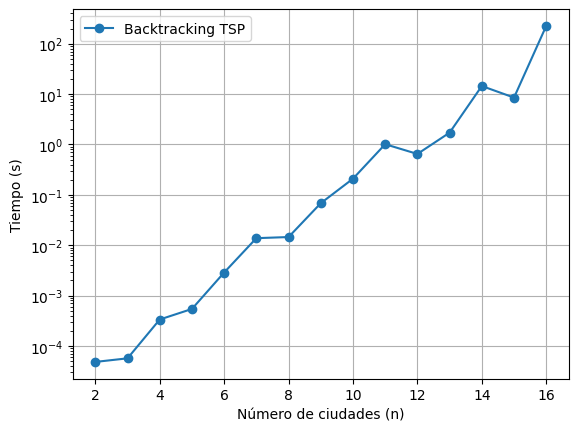

In [49]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt

def tsp_backtracking(dist):
    n = len(dist)
    best_cost = float("inf")

    visited = [False] * n

    def backtrack(curr_city, visited_count, curr_cost, start_city):
        nonlocal best_cost

        # poda
        if curr_cost >= best_cost:
            return

        # ciclo completo
        if visited_count == n:
            total_cost = curr_cost + dist[curr_city][start_city]
            best_cost = min(best_cost, total_cost)
            return

        for next_city in range(n):
            if not visited[next_city]:
                visited[next_city] = True
                backtrack(
                    next_city,
                    visited_count + 1,
                    curr_cost + dist[curr_city][next_city],
                    start_city
                )
                visited[next_city] = False

    # NO fijamos inicio: probamos todos
    for start in range(n):
        visited[start] = True
        backtrack(start, 1, 0, start)
        visited[start] = False

    return best_cost

def medir_tiempos(max_n, seed=0):
    np.random.seed(seed)
    ns = []
    times = []

    for n in range(2, max_n + 1):
        dist = np.random.rand(n, n)
        np.fill_diagonal(dist, 0)

        start = time.perf_counter()
        tsp_backtracking(dist)
        end = time.perf_counter()

        ns.append(n)
        times.append(end - start)

        print(f"n={n}, time={end-start:.4f}s")

    return np.array(ns), np.array(times)

ns, times_bt = medir_tiempos(16)

plt.figure()
plt.plot(ns, times_bt, "o-", label="Backtracking TSP")
plt.xlabel("Número de ciudades (n)")
plt.ylabel("Tiempo (s)")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()



## Comparación BF y BT:

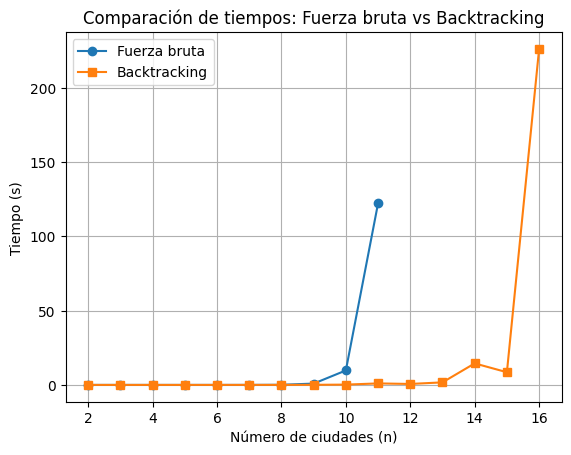

In [50]:
plt.figure()

# Fuerza bruta
plt.plot(ns[:len(times)], times, "o-", label="Fuerza bruta")

# Backtracking (solo donde existe)
plt.plot(ns[:len(times_bt)], times_bt, "s-", label="Backtracking")

plt.xlabel("Número de ciudades (n)")
plt.ylabel("Tiempo (s)")
plt.title("Comparación de tiempos: Fuerza bruta vs Backtracking")
plt.legend()
plt.grid(True, which="both")
plt.show()


## Greedy (Nearest neighbour heuristic)

In [51]:
import time
import numpy as np

def tsp_nearest_neighbor(dist, n):
    """
    TSP Nearest Neighbor probando TODOS los posibles nodos iniciales
    y quedándose con el mejor.
    """
    best_cost = np.inf
    best_route = None

    for start in range(n):
        unvisited = set(range(n))
        route = [start]
        unvisited.remove(start)
        cost = 0
        current = start

        while unvisited:
            next_city = min(
                unvisited,
                key=lambda j: dist[current][j]
            )
            cost += dist[current][next_city]
            current = next_city
            route.append(current)
            unvisited.remove(current)

        cost += dist[current][start]  # cerrar ciclo
        route.append(start)

        if cost < best_cost:
            best_cost = cost
            best_route = route

    return best_route, best_cost

ns = list(range(2, 20))
times_nn = []
costs_nn = []
routes_nn = []

for n in ns:
    dist_n = np.array(distance_matrix)[:n, :n]

    t0 = time.perf_counter()
    route, cost = tsp_nearest_neighbor(dist_n, n)
    t1 = time.perf_counter()

    times_nn.append(t1 - t0)
    costs_nn.append(cost)
    routes_nn.append(route)

    print(f"NN | n={n:2d} | cost={cost:6.0f} | time={t1-t0:.6f}s")


NN | n= 2 | cost=   100 | time=0.000083s
NN | n= 3 | cost=   290 | time=0.000076s
NN | n= 4 | cost=   430 | time=0.000064s
NN | n= 5 | cost=   670 | time=0.000092s
NN | n= 6 | cost=   750 | time=0.000141s
NN | n= 7 | cost=   870 | time=0.000218s
NN | n= 8 | cost=  1000 | time=0.000357s
NN | n= 9 | cost=  1480 | time=0.000484s
NN | n=10 | cost=  1840 | time=0.000629s
NN | n=11 | cost=  1840 | time=0.000755s
NN | n=12 | cost=  1900 | time=0.001908s
NN | n=13 | cost=  1840 | time=0.001088s
NN | n=14 | cost=  1860 | time=0.001416s
NN | n=15 | cost=  1770 | time=0.001853s
NN | n=16 | cost=  1860 | time=0.002157s
NN | n=17 | cost=  1930 | time=0.002631s
NN | n=18 | cost=  2130 | time=0.005972s
NN | n=19 | cost=  2540 | time=0.003980s


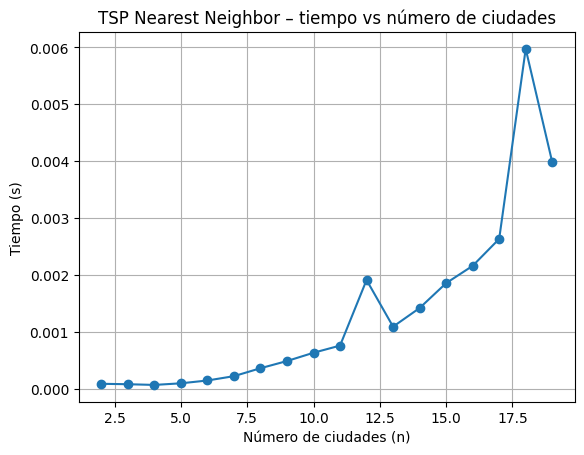

In [53]:
plt.figure()
plt.plot(ns, times_nn, "o-", label="Nearest Neighbor")
plt.xlabel("Número de ciudades (n)")
plt.ylabel("Tiempo (s)")
plt.title("TSP Nearest Neighbor – tiempo vs número de ciudades")
plt.grid(True)

## Comparación de las 3

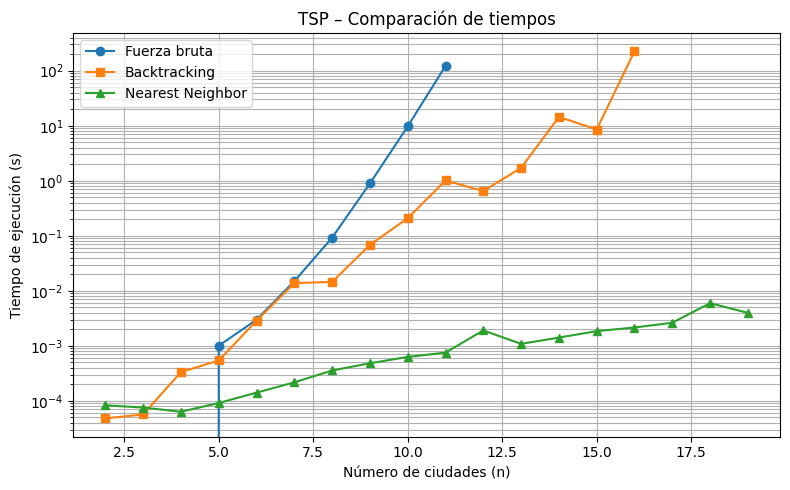

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

# Fuerza bruta
plt.plot(
    ns[:len(times)],
    times,
    "o-",
    label="Fuerza bruta"
)

# Backtracking
plt.plot(
    ns[:len(times_bt)],
    times_bt,
    "s-",
    label="Backtracking"
)

# Nearest Neighbor
plt.plot(
    ns[:len(times_nn)],
    times_nn,
    "^-",
    label="Nearest Neighbor"
)

plt.yscale("log")
plt.xlabel("Número de ciudades (n)")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("TSP – Comparación de tiempos")
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


## NN + 2-Opt

In [55]:
def route_cost(route, dist):
    cost = 0
    for i in range(len(route) - 1):
        cost += dist[route[i]][route[i+1]]
    return cost
def two_opt(route, dist):
    best = route
    best_cost = route_cost(best, dist)
    improved = True

    while improved:
        improved = False
        for i in range(1, len(best) - 2):
            for j in range(i + 1, len(best) - 1):
                if j - i == 1:
                    continue

                new_route = best[:]
                new_route[i:j] = reversed(best[i:j])

                new_cost = route_cost(new_route, dist)

                if new_cost < best_cost:
                    best = new_route
                    best_cost = new_cost
                    improved = True
        route = best

    return best, best_cost
def tsp_nn_2opt(dist, n):
    route_nn, cost_nn = tsp_nearest_neighbor(dist, n)
    route_2opt, cost_2opt = two_opt(route_nn, dist)
    return route_2opt, cost_2opt
times_nn2 = []
costs_nn2 = []

for n in ns:
    dist_n = np.array(distance_matrix)[:n, :n]

    t0 = time.perf_counter()
    route, cost = tsp_nn_2opt(dist_n, n)
    t1 = time.perf_counter()

    times_nn2.append(t1 - t0)
    costs_nn2.append(cost)

    print(f"NN+2opt | n={n:2d} | cost={cost:6.0f} | time={t1-t0:.6f}s")



NN+2opt | n= 2 | cost=   100 | time=0.000179s
NN+2opt | n= 3 | cost=   290 | time=0.000171s
NN+2opt | n= 4 | cost=   430 | time=0.000182s
NN+2opt | n= 5 | cost=   670 | time=0.000152s
NN+2opt | n= 6 | cost=   750 | time=0.000229s
NN+2opt | n= 7 | cost=   870 | time=0.000378s
NN+2opt | n= 8 | cost=  1000 | time=0.000419s
NN+2opt | n= 9 | cost=  1460 | time=0.000815s
NN+2opt | n=10 | cost=  1820 | time=0.001051s
NN+2opt | n=11 | cost=  1820 | time=0.000922s
NN+2opt | n=12 | cost=  1880 | time=0.000923s
NN+2opt | n=13 | cost=  1820 | time=0.001511s
NN+2opt | n=14 | cost=  1840 | time=0.003029s
NN+2opt | n=15 | cost=  1720 | time=0.002967s
NN+2opt | n=16 | cost=  1850 | time=0.004329s
NN+2opt | n=17 | cost=  1900 | time=0.003755s
NN+2opt | n=18 | cost=  2100 | time=0.003241s
NN+2opt | n=19 | cost=  2450 | time=0.003470s


## Comparación de los 4

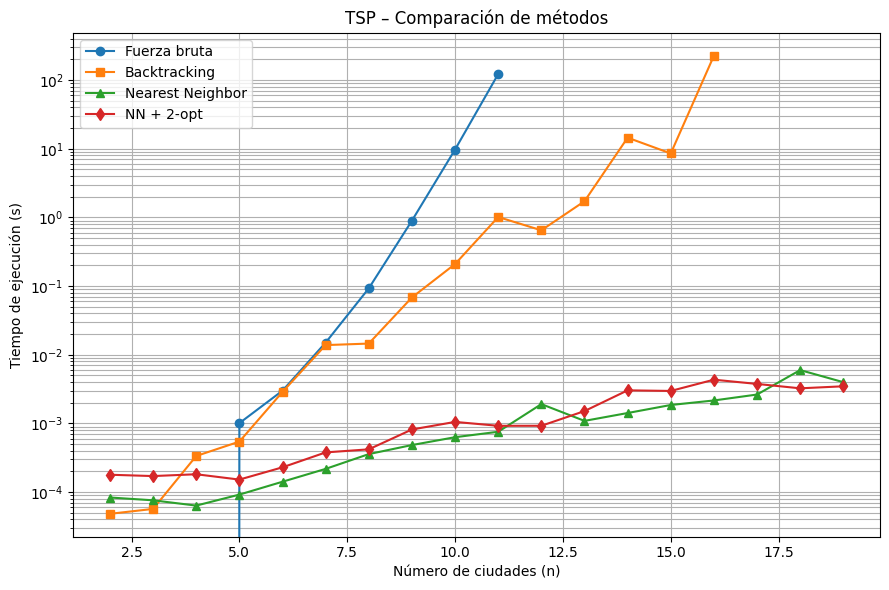

In [56]:
plt.figure(figsize=(9, 6))

plt.plot(ns[:len(times)], times, "o-", label="Fuerza bruta")
plt.plot(ns[:len(times_bt)], times_bt, "s-", label="Backtracking")
plt.plot(ns[:len(times_nn)], times_nn, "^-", label="Nearest Neighbor")
plt.plot(ns[:len(times_nn2)], times_nn2, "d-", label="NN + 2-opt")

plt.yscale("log")
plt.xlabel("Número de ciudades (n)")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("TSP – Comparación de métodos")
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


| Método                    | Orden de complejidad            | ¿Exacto? | ¿Cota superior de error?  |
| ------------------------- | ------------------------------- | -------- | ------------------------- |
| **Fuerza Bruta (FB)**     | (O(n!))                         | ✅ Sí     | 0 (óptimo garantizado)    |
| **Backtracking (BT)**     | Exponencial (peor caso (O(n!))) | ✅ Sí     | 0 (óptimo garantizado)    |
| **Nearest Neighbor (NN)** | (O(n^3)) *(todos los starts)*   | ❌ No     | ❌ No (puede ser muy malo) |
| **NN + 2-opt**            | (O(n^3))–(O(n^4))               | ❌ No     | ❌ No (mejora empírica)    |


| Método           | Exacto | Garantía | Cota  |
| ---------------- | ------ | -------- | ----- |
| Fuerza Bruta     | ✅      | Sí       | 1.0   |
| Backtracking     | ✅      | Sí       | 1.0   |
| Double Tree      | ❌      | Sí       | ≤ 2   |
| Christofides     | ❌      | Sí       | ≤ 1.5 |
| Nearest Neighbor | ❌      | No       | —     |
| NN + 2-opt       | ❌      | No       | —     |



###  Double Tree

Double Tree construye primero un árbol generador mínimo (MST) que conecta todas las ciudades con costo mínimo.
Luego duplica sus aristas para poder recorrerlas y genera un tour “atajando” ciudades ya visitadas.
Es un algoritmo aproximado de orden (O(n^2)) que garantiza una solución de costo a lo sumo el doble del óptimo en TSP métricos.

---

###  Christofides

Christofides parte de un árbol generador mínimo y agrega un matching mínimo entre los nodos de grado impar.
Con esto construye un recorrido euleriano que se transforma en un tour hamiltoniano.
Es un algoritmo aproximado de orden (O(n^3)) que garantiza una solución de costo a lo sumo 1.5 veces el óptimo en TSP métricos.
